In [1]:
import pandas as pd
import os

In [2]:
df = pd.read_csv('./Sales_Data/Sales_April_2019.csv')

files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv('all_data.csv', index=False)


In [3]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
#cleaning data

#drop rows of NaN

nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [5]:
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_df.head()

all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [6]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [7]:
#augment data with additional columns

all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')

import calendar

all_data['Month'] = all_data['Month'].apply(lambda x: calendar.month_abbr[x])
all_data['Month'] = pd.Categorical(all_data['Month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr


In [8]:
#add sales column

all_data['Order Total'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data = all_data[['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Total', 'Order Date', 'Month', 'Purchase Address']]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Total,Order Date,Month,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,Apr,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,Apr,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,Apr,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,Apr,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,Apr,"333 8th St, Los Angeles, CA 90001"


In [9]:
#best month for sales

results = all_data.groupby('Month').sum()
results.sort_values(by=['Month'])
results

,Quantity Ordered,Price Each,Order Total
Month,,,
Jan,10903,1811768.38,1822256.73
Feb,13449,2188884.72,2202022.42
Mar,17005,2791207.83,2807100.38
Apr,20558,3367671.02,3390670.24
May,18667,3135125.13,3152606.75
Jun,15253,2562025.61,2577802.26
Jul,16072,2632539.56,2647775.76
Aug,13448,2230345.42,2244467.88
Sep,13109,2084992.09,2097560.13


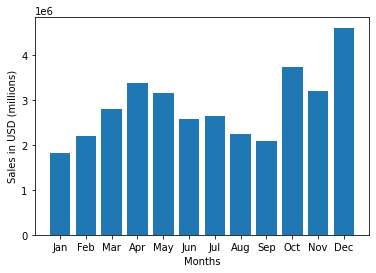

In [10]:
import matplotlib.pyplot as plt


months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.bar(months, results['Order Total'])
plt.ylabel('Sales in USD (millions)')
plt.xlabel('Months')
plt.show()

In [11]:
all_data[['Street', 'City', 'State']] = all_data['Purchase Address'].str.split(',', expand=True)
all_data[['State2', 'Zip Code']] = all_data['State'].str.split(expand=True)
all_data.drop(['State'], axis=1, inplace=True)
all_data.rename(columns={'State2': 'State'}, inplace=True)

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Total,Order Date,Month,Purchase Address,Street,City,State,Zip Code
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,Apr,"917 1st St, Dallas, TX 75001",917 1st St,Dallas,TX,75001
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,Apr,"682 Chestnut St, Boston, MA 02215",682 Chestnut St,Boston,MA,02215
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,Apr,"669 Spruce St, Los Angeles, CA 90001",669 Spruce St,Los Angeles,CA,90001
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,Apr,"669 Spruce St, Los Angeles, CA 90001",669 Spruce St,Los Angeles,CA,90001
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,Apr,"333 8th St, Los Angeles, CA 90001",333 8th St,Los Angeles,CA,90001


In [12]:
city_results = all_data.groupby(['City', 'State']).sum()
city_results.sort_values(by=['Order Total'], ascending=False, inplace=True)
city_results

,,Quantity Ordered,Price Each,Order Total
City,State,,,
San Francisco,CA,50239,8211461.74,8262203.91
Los Angeles,CA,33289,5421435.23,5452570.80
New York City,NY,27932,4635370.83,4664317.43
Boston,MA,22528,3637409.77,3661642.01
Atlanta,GA,16602,2779908.20,2795498.58
Dallas,TX,16730,2752627.82,2767975.40
Seattle,WA,16553,2733296.01,2747755.48
Portland,OR,11303,1860558.22,1870732.34
Austin,TX,11153,1809873.61,1819581.75


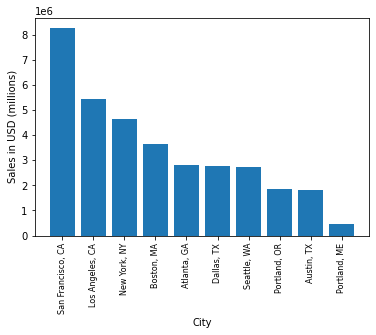

In [13]:
import matplotlib.pyplot as plt

cities = ['San Francisco, CA', 'Los Angeles, CA', 'New York, NY', 'Boston, MA', 'Atlanta, GA', 'Dallas, TX', 'Seattle, WA', 'Portland, OR', 'Austin, TX', 'Portland, ME']

plt.bar(cities, city_results['Order Total'])
plt.xticks(cities, rotation='vertical', size = 8)
plt.ylabel('Sales in USD (millions)')
plt.xlabel('City')
plt.show()

In [14]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Total,Order Date,Month,Purchase Address,Street,City,State,Zip Code,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,Apr,"917 1st St, Dallas, TX 75001",917 1st St,Dallas,TX,75001,8,46
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,Apr,"682 Chestnut St, Boston, MA 02215",682 Chestnut St,Boston,MA,02215,22,30
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,Apr,"669 Spruce St, Los Angeles, CA 90001",669 Spruce St,Los Angeles,CA,90001,14,38
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,Apr,"669 Spruce St, Los Angeles, CA 90001",669 Spruce St,Los Angeles,CA,90001,14,38
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,Apr,"333 8th St, Los Angeles, CA 90001",333 8th St,Los Angeles,CA,90001,9,27


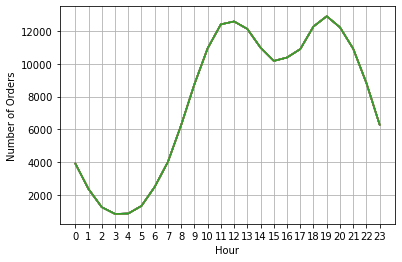

In [15]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

In [16]:
#most common items ordered together

df_orders = all_data[all_data['Order ID'].duplicated(keep=False)]

df_orders['Grouped'] = df_orders.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

df_orders = df_orders[['Order ID', 'Grouped']].drop_duplicates()
df_orders.head()

C:\Users\jonat\AppData\Local\Temp/ipykernel_23804/2960446189.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders['Grouped'] = df_orders.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [17]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df_orders['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


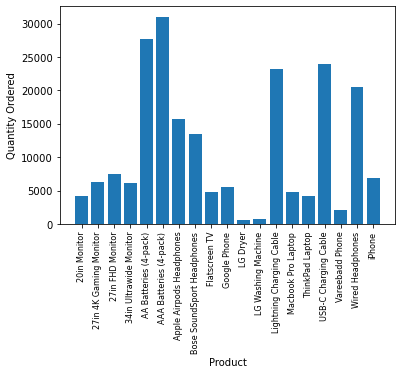

In [18]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size=8)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.show()

C:\Users\jonat\AppData\Local\Temp/ipykernel_23804/4075353779.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


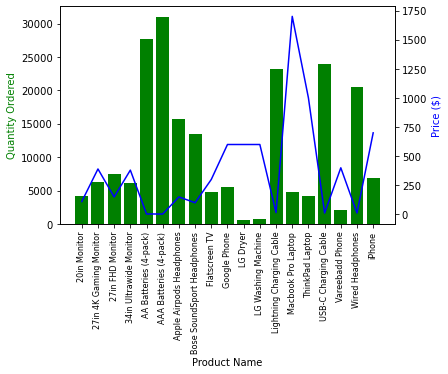

In [19]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color = 'g')
ax2.set_ylabel('Price ($)', color = 'b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()